# **I. Introduction**


Nama : Monica M. Pratiwi
<br>
Batch : FTDS-016-RMT

## **Dataset yang Digunakan**

Dataset yang digunakan adalah dataset 'Black Friday Sales EDA' yang diperoleh dari [link berikut](https://www.kaggle.com/datasets/pranavuikey/black-friday-sales-eda). Mengutip dari laman sumber data, data ini merupakan ringkasan pembelian produk terpilih dengan volume tinggi oleh berbagai pelanggan dari perusahaan ritel "ABC Private Limited".

## **Objective**

Memprediksi besarnya pembelian yang akan dilakukan oleh customer ritel "ABC Private Limited".

# **II. Import Libraries**

In [97]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')


from numpy import array 
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


import joblib
import json
import warnings
warnings.filterwarnings("ignore")

# **III. Data Loading**

In [2]:
# Loading Dataset
data = pd.read_csv('/content/drive/MyDrive/bq-results-20221121-072603-1669016735963/train.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
#Show the last 5 rows of the data
data.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [4]:
# Make a copy
data2 = data.copy()

Berdasarkan tampilan 5 baris data teratas dan 5 baris data terbawah dapat terlihat bahwa kolom `Product_ID`, `Gender`, `City_Category`, dan	`Stay_In_Current_City_Years` merupakan data kategorikal. Kolom `Age` merupakan data interval, dan terlihat missing values pada kolom product_category_2 dan product_category_3. Untuk lebih memastikan, dapat dilihat dari informasi data.

In [5]:
# Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Berdasarkan informasi data di atas, dapat diketahui bahwa terdapat 12 kolom dan 550068 baris pada dataset ini. Missing values terdeteksi pada kolom `product_category_2` dan `product_category_3`.  Sebanyak 5 kolom memiliki tipe data integer, 5 kolom merupakan data dengan tipe object, dan 2 lainnya adalah tipe data float. 
<br>
Jumlah data yang cukup banyak dan waktu yang terbatas menyebabkan akan dilakukannya penghapusan agar dapat mengilustrasikan hasilnya dengan baik.

In [6]:
# Drop Rows with Index 0-540000
data.drop(data.loc[0:540000].index, inplace=True)

In [7]:
# Reset Data Index
data.reset_index(drop=True, inplace=True)

In [8]:
# Load Data After Removal
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1005124,P00100842,M,36-45,2,B,1,0,5,NaN,NaN,5210
1,1005126,P00021042,M,26-35,11,B,4+,0,8,14.0,NaN,9885
2,1005126,P00329442,M,26-35,11,B,4+,0,5,8.0,NaN,7179
3,1005126,P00210942,M,26-35,11,B,4+,0,5,12.0,NaN,5213
4,1005126,P00128342,M,26-35,11,B,4+,0,5,12.0,14.0,3571


In [9]:
# Load Information After Removal
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10067 entries, 0 to 10066
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     10067 non-null  int64  
 1   Product_ID                  10067 non-null  object 
 2   Gender                      10067 non-null  object 
 3   Age                         10067 non-null  object 
 4   Occupation                  10067 non-null  int64  
 5   City_Category               10067 non-null  object 
 6   Stay_In_Current_City_Years  10067 non-null  object 
 7   Marital_Status              10067 non-null  int64  
 8   Product_Category_1          10067 non-null  int64  
 9   Product_Category_2          4159 non-null   float64
 10  Product_Category_3          1779 non-null   float64
 11  Purchase                    10067 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 943.9+ KB


Saat ini, data yang akan digunakan memiliki 10067 baris dan terdapat missing values pada kolom `Product_Category_2` dan `Product_Category_3.

In [10]:
# Data Summary
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,1.006700e+04,10067.000000,10067.000000,10067.000000,4159.000000,1779.000000,10067.000000
mean,1.004543e+06,7.864607,0.434489,11.212774,9.872325,12.515458,5546.498063
std,1.695967e+03,6.459755,0.495714,7.601647,5.055993,4.231512,5840.593604
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.003714e+06,2.000000,0.000000,5.000000,5.000000,9.000000,256.000000
50%,1.005363e+06,7.000000,0.000000,8.000000,9.000000,14.000000,4481.000000
75%,1.005692e+06,14.000000,1.000000,20.000000,14.000000,16.000000,8741.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23945.000000


Berdasarkan ringkasan data , dapat terlihat bahwa terdapat 20 kategori produk dan setiap produk dapat terdiri atas 3 kategori. Rata-rata pengunjung melakukan pembelian sebanyak 8589.

# **IV. Exploratory Data Analysis (EDA)**

In [11]:
# Total amount of female and male customer
data['Gender'].value_counts()

M    7124
F    2943
Name: Gender, dtype: int64

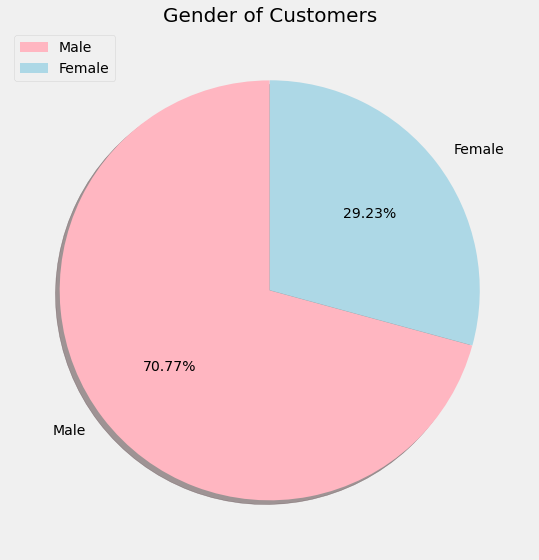

In [12]:
# Compare the Gender of Customers
labels = ['Male', 'Female']
size = data['Gender'].value_counts()
colors = ['lightpink', 'lightblue']
explode = [0, 0.001]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, startangle = 90, autopct = '%.2f%%')
plt.title('Gender of Customers', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

Sebagian besar customer ritel "ABC Private Limited" adalah laki-laki dengan persentase mencapai 70%

In [13]:
data["City_Category"].value_counts()

C    3927
B    3603
A    2537
Name: City_Category, dtype: int64

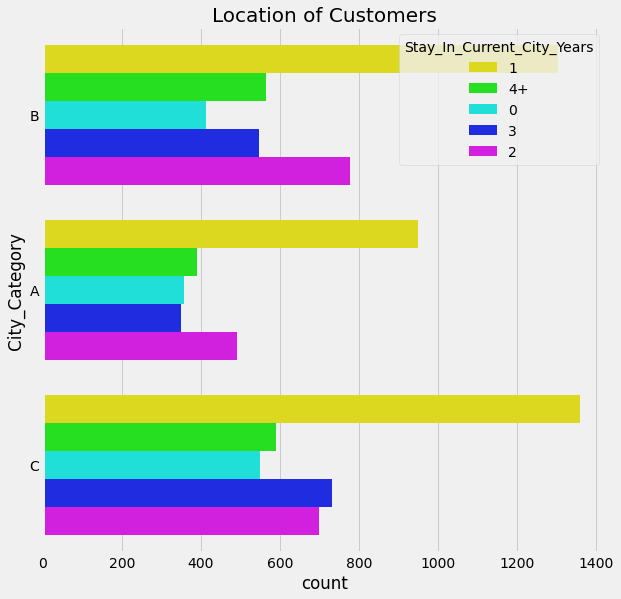

In [14]:
# Distribution of Customer Location
sns.countplot(data=data, y="City_Category", hue="Stay_In_Current_City_Years", palette='hsv')
plt.title('Location of Customers', fontsize = 20)
plt.show()

Customer ritel "ABC Private Limited" berasal dari tiga wilayah yaitu wilayah a, B, dan C dengan jumlah terbanyaknya adalah penduduk yang tinggal selama setahun di wilayah masing-masing atau dapat dikatakan penduduk baru. Bisa jadi customer ini mencari kebutuhan untuk tempat tinggal mereka.

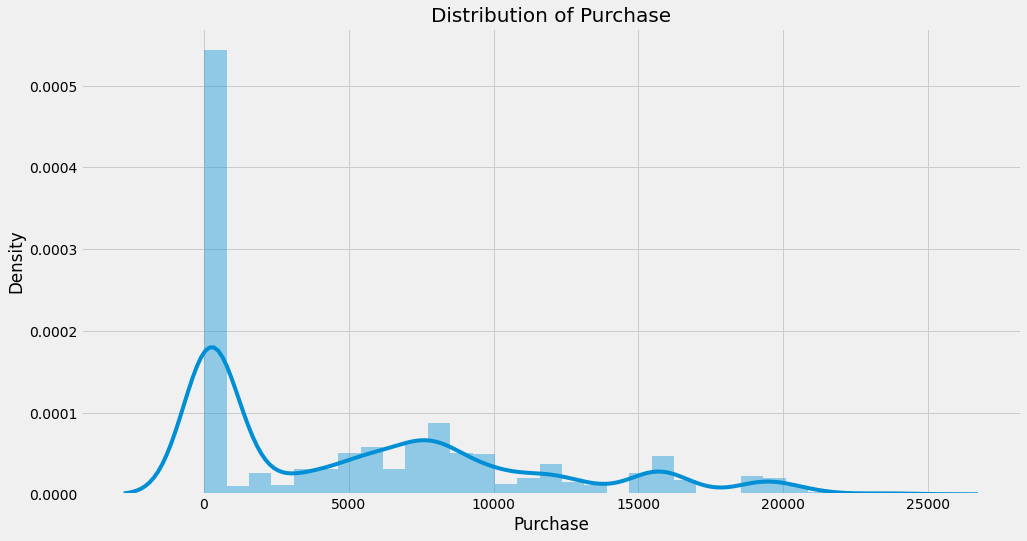

In [15]:
plt.figure(figsize=(15,8))
sns.distplot(data['Purchase'])
plt.title('Distribution of Purchase', fontsize = 20)
plt.show()

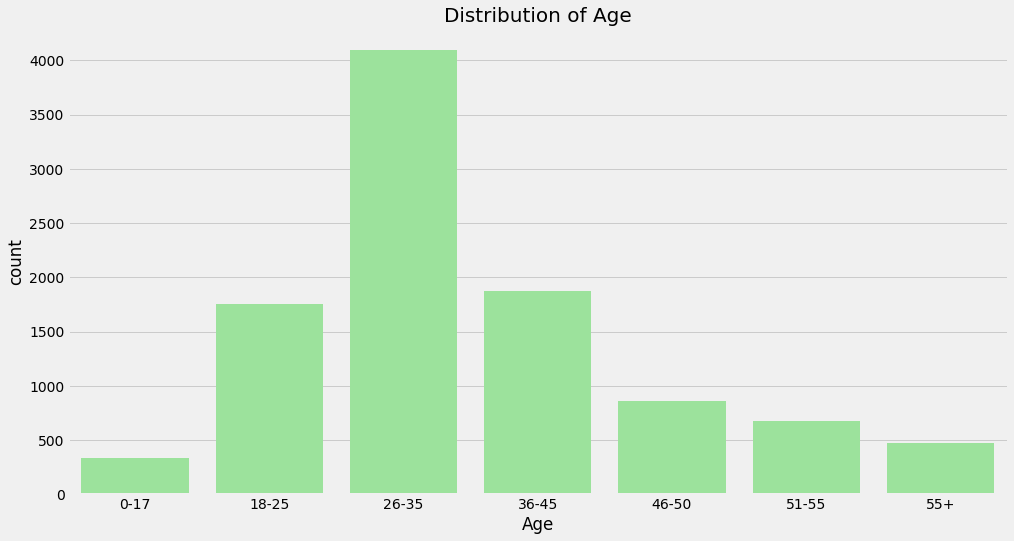

In [16]:
# Distribution of Age
age = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(data['Age'], order=age, color='lightgreen')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

Sebagian besar ritel "ABC Private Limited" merupakan penduduk dengan usia 26-35 tahun yang merupakan usia pekerja yang aktif.

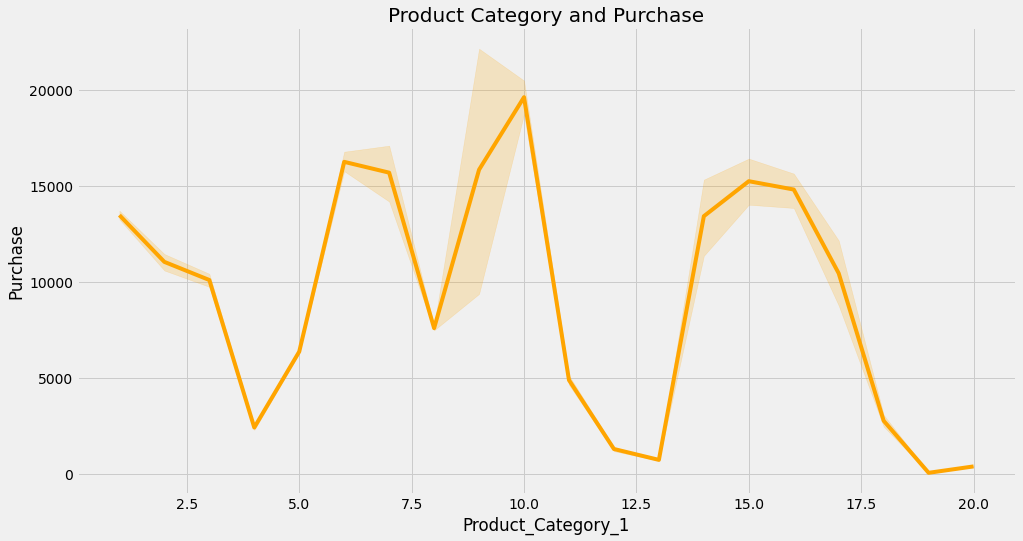

In [17]:
# Product Category and Purchase
x = data['Product_Category_1']
y = data['Purchase']

sns.lineplot(x, y, color = 'orange')
plt.title('Product Category and Purchase', fontsize = 20)
plt.show()

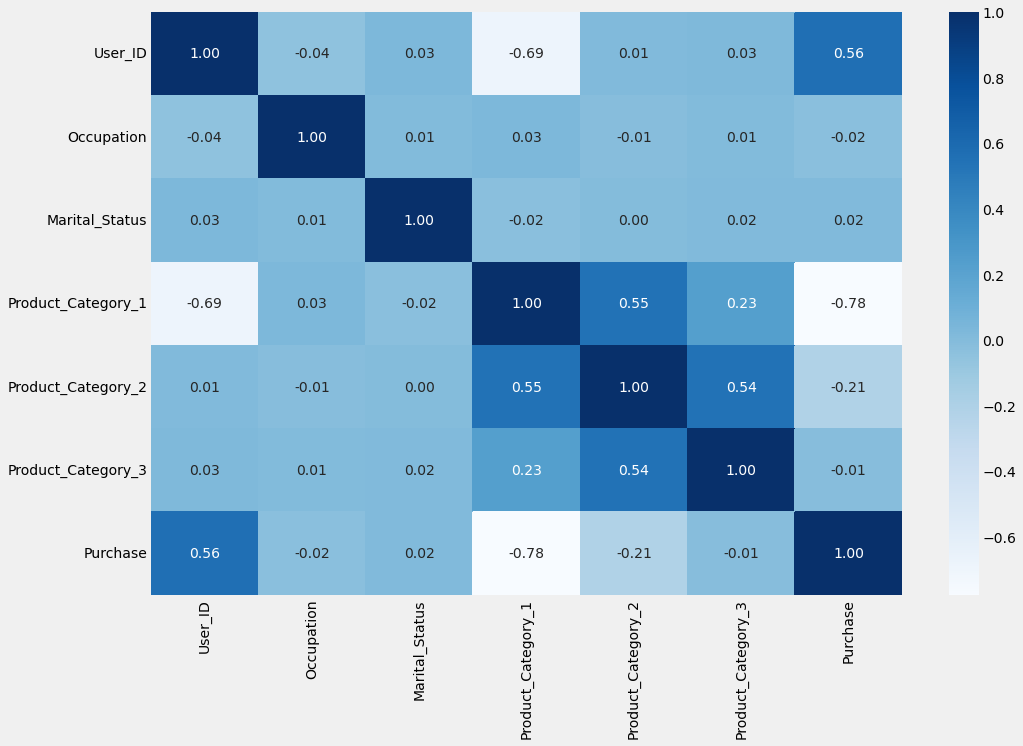

CPU times: user 519 ms, sys: 108 ms, total: 627 ms
Wall time: 552 ms


In [18]:
%%time
# Heatmap Correlation Matrix
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, cmap='Blues', fmt='.2f')
plt.show()

Hampir sebagian besar fitur memiliki korelasi antar fitur yang rendah selain antara Purchase dan User_ID, Product category 2 dan product category 3,dan product category 2 dan product categry 1

# **V. Data Preprocessing**

## **Get data for Model Inference**

In [19]:
# Get data for model inference

data_inference = data.sample(20, random_state=1997)

In [20]:
# Remove inference set from dataset

data_train_test = data.drop(data_inference.index)

In [21]:
# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inference.reset_index(drop=True, inplace=True)

## **Splitting Between X (Feature) and y (Target)**

In [22]:
# Splitting between `X ` AND `y`

X = data_train_test.drop(['Purchase'], axis=1) 
y = data_train_test['Purchase']
X.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1005124,P00100842,M,36-45,2,B,1,0,5,NaN,NaN
1,1005126,P00021042,M,26-35,11,B,4+,0,8,14.0,NaN
2,1005126,P00329442,M,26-35,11,B,4+,0,5,8.0,NaN
3,1005126,P00210942,M,26-35,11,B,4+,0,5,12.0,NaN
4,1005126,P00128342,M,26-35,11,B,4+,0,5,12.0,14.0


In [23]:
# Splitting between Train-Set dengan Test-Set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1795)
print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (8037, 11)
Test Size:  (2010, 11)


## **Outlier**

In [24]:
# Function to create histogram and boxplot.

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], kde=True, bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

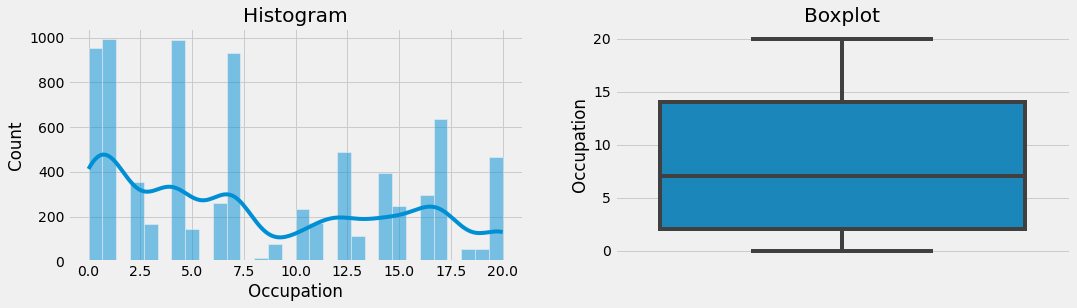


Skewness Value :  0.4089533714066198


In [25]:
#Histogram and Boxplot for `Occupation`
diagnostic_plots(X_train, 'Occupation')
print('\nSkewness Value : ', X_train['Occupation'].skew())

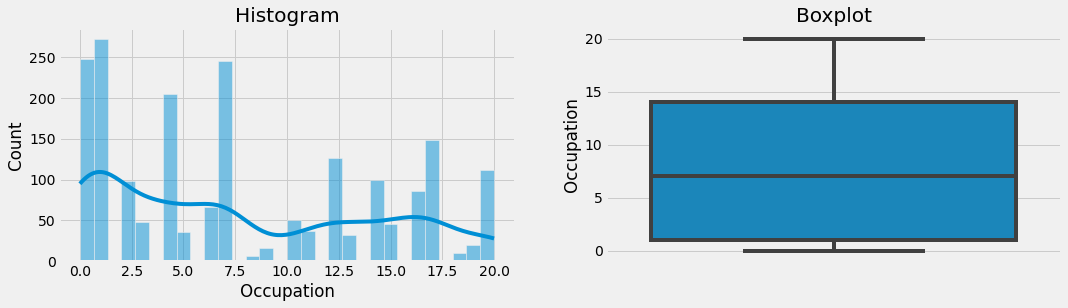


Skewness Value :  0.43354575870752043


In [26]:
#Histogram and Boxplot for `Occupation`
diagnostic_plots(X_test, 'Occupation')
print('\nSkewness Value : ', X_test['Occupation'].skew())

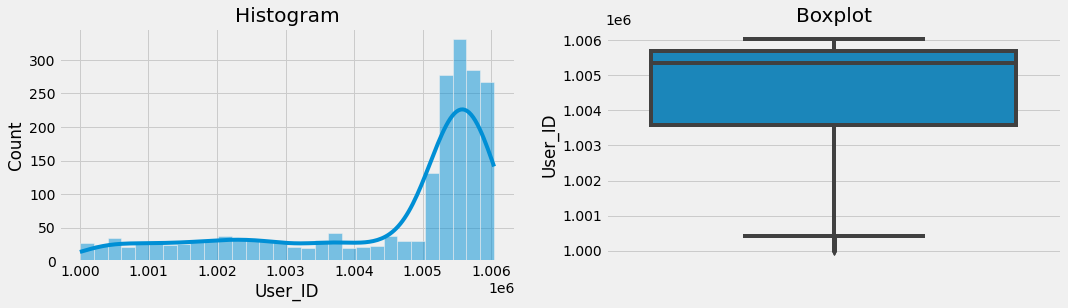


Skewness Value :  -1.2225838915560925


In [27]:
#Histogram and Boxplot for `User_ID`
diagnostic_plots(X_test, 'User_ID')
print('\nSkewness Value : ', X_test['User_ID'].skew())

Data-data numerical yang terdapat pada data X (feature) pada dasarnya merupakan data yang mewakili nilai kategorikal. Misal, pada grafik histogram dan boxplot dari kolom `Occupation` di atas. Data memiliki distribusi yang normal dengan tiap angka mewakili pekerjaan tertentu. Penanganan outlier pada data ini dirasa tidak perlu untuk dilakukan.

## **Missing Values**

In [28]:
# Check Missing Values in `X_train`
X_train.isna().sum()

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            4729
Product_Category_3            6601
dtype: int64

In [29]:
# Check Missing Values in `X_test`
X_test.isna().sum()

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            1167
Product_Category_3            1667
dtype: int64

In [30]:
# Check Missing Values in `y_train`
y_train.isna().sum()

0

In [31]:
# Check Missing Values in `y_test`
y_test.isna().sum()

0

In [32]:
# Impute the missing values with median and check missing values after imputation
X_train['Product_Category_2'].fillna(X_train['Product_Category_2'].median(), inplace=True)
X_test['Product_Category_2'].fillna(X_test['Product_Category_2'].median(), inplace=True)
X_train['Product_Category_3'].fillna(X_train['Product_Category_3'].median(), inplace=True)
X_test['Product_Category_3'].fillna(X_train['Product_Category_3'].median(), inplace=True)
print('Missing Values after imputation: \n')
print(X_train.isna().sum())

Missing Values after imputation: 

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64


## **Feature Selection**

Pada kolom `Stay_In_Current_City_Years` terdapat nilai 4+ yang melambangkan lebih dari 4 tahun. Nilai 4+ akan diubah menjadi 4 yang memiliki arti lebih dari atau sama dengan 4 tahun.

In [33]:
# Replacing Value `4+` to `4`
X_train.replace("4+", "4", inplace=True)
X_test.replace("4+", "4", inplace=True)
X_train.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
412,1005208,P00283942,M,26-35,4,A,1,1,5,9.0,14.0
3915,1005749,P00048842,M,26-35,2,A,0,1,8,9.0,14.0
38,1005133,P00279342,M,18-25,11,B,0,0,5,14.0,14.0
4335,1005795,P00107642,M,26-35,1,A,1,1,5,9.0,14.0
3918,1005749,P00011742,M,26-35,2,A,0,1,8,9.0,14.0


In [34]:
# Change Data Type
X_train = X_train.astype({'Stay_In_Current_City_Years': int})
X_test = X_test.astype({'Stay_In_Current_City_Years': int})
print('New Data Type: \n')
print(X_train.info())

New Data Type: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8037 entries, 3335 to 3918
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     8037 non-null   int64  
 1   Product_ID                  8037 non-null   object 
 2   Gender                      8037 non-null   object 
 3   Age                         8037 non-null   object 
 4   Occupation                  8037 non-null   int64  
 5   City_Category               8037 non-null   object 
 6   Stay_In_Current_City_Years  8037 non-null   int64  
 7   Marital_Status              8037 non-null   int64  
 8   Product_Category_1          8037 non-null   int64  
 9   Product_Category_2          8037 non-null   float64
 10  Product_Category_3          8037 non-null   float64
dtypes: float64(2), int64(5), object(4)
memory usage: 753.5+ KB
None


In [35]:
# Drop `Product_ID`
unused = ['User_ID', 'Product_ID']
X_train.drop(unused, axis=1, inplace=True)
X_test.drop(unused, axis=1, inplace=True)

## **Split between Numerical columns and Categorical Columns**

In [36]:
# Show `X_train` as guidance
X_train

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
3335,F,26-35,6,C,0,0,3,4.0,5.0
6423,F,55+,3,C,1,0,19,9.0,14.0
5808,F,26-35,1,B,1,0,5,11.0,14.0
5353,F,18-25,4,B,2,0,8,15.0,14.0
3025,F,18-25,4,C,0,0,2,4.0,9.0
...,...,...,...,...,...,...,...,...,...
412,M,26-35,4,A,1,1,5,9.0,14.0
3915,M,26-35,2,A,0,1,8,9.0,14.0
38,M,18-25,11,B,0,0,5,14.0,14.0
4335,M,26-35,1,A,1,1,5,9.0,14.0


In [37]:
# Get Numerical columns and Categorical Column

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns: ', num_columns)
print('Categorical Columns: ', cat_columns)

Numerical Columns:  ['Occupation', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']
Categorical Columns:  ['Gender', 'Age', 'City_Category']


In [38]:
# Split Train-Set and Test-Set based on Column Types

X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

X_train_cat = X_train[cat_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
3335,6,0,0,3,4.0,5.0
6423,3,1,0,19,9.0,14.0
5808,1,1,0,5,11.0,14.0
5353,4,2,0,8,15.0,14.0
3025,4,0,0,2,4.0,9.0
...,...,...,...,...,...,...
412,4,1,1,5,9.0,14.0
3915,2,0,1,8,9.0,14.0
38,11,0,0,5,14.0,14.0
4335,1,1,1,5,9.0,14.0


## **Pipeline**

In [39]:
# Make Pipeline for Numerical Value
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', MinMaxScaler())
    ])

X_train_num_tr = num_pipeline.fit_transform(X_train_num[['Occupation',	'Stay_In_Current_City_Years',	'Marital_Status',	'Product_Category_1',	'Product_Category_2',	'Product_Category_3']])
X_train_num_tr

array([[0.3       , 0.        , 0.        , 0.10526316, 0.125     ,
        0.13333333],
       [0.15      , 0.25      , 0.        , 0.94736842, 0.4375    ,
        0.73333333],
       [0.05      , 0.25      , 0.        , 0.21052632, 0.5625    ,
        0.73333333],
       ...,
       [0.55      , 0.        , 0.        , 0.21052632, 0.75      ,
        0.73333333],
       [0.05      , 0.25      , 1.        , 0.21052632, 0.4375    ,
        0.73333333],
       [0.1       , 0.        , 1.        , 0.36842105, 0.4375    ,
        0.73333333]])

In [40]:
# Make Pipeline for Ordinal/Categorical Value
cat_1_pipeline = Pipeline([
        ('ordinal_enc', OrdinalEncoder(categories=[['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']])) #age
    ])

X_train_cat_1_tr = cat_1_pipeline.fit_transform(X_train_cat[['Age']])
X_train_cat_1_tr

array([[2.],
       [6.],
       [2.],
       ...,
       [1.],
       [2.],
       [2.]])

In [41]:
# Make Pipeline for Categorical Value
cat_2_pipeline = Pipeline([
        ('ohe_enc', OneHotEncoder(handle_unknown='ignore', sparse=False)) #Gender, City_Category
    ])

X_train_cat_2_tr = cat_2_pipeline.fit_transform(X_train[['Gender', 'City_Category']])
X_train_cat_2_tr

array([[1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 1., 0.],
       [0., 1., 1., 0., 0.],
       [0., 1., 1., 0., 0.]])

In [42]:
# Combine Pipeline
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, ['Occupation',	'Stay_In_Current_City_Years',	'Marital_Status',	'Product_Category_1',	'Product_Category_2',	'Product_Category_3']),
        ("cat_ord", cat_1_pipeline, ['Age']),
        ("cat_ohe", cat_2_pipeline, ['Gender', 'City_Category']),
    ])

X_train_tr = full_pipeline.fit_transform(X_train)
X_train_tr

array([[0.3 , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.15, 0.25, 0.  , ..., 0.  , 0.  , 1.  ],
       [0.05, 0.25, 0.  , ..., 0.  , 1.  , 0.  ],
       ...,
       [0.55, 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.05, 0.25, 1.  , ..., 1.  , 0.  , 0.  ],
       [0.1 , 0.  , 1.  , ..., 1.  , 0.  , 0.  ]])

In [43]:
# Transform pipeline to `X_test`
X_test_tr = full_pipeline.transform(X_test)
X_test_tr

array([[0.35, 1.  , 0.  , ..., 1.  , 0.  , 0.  ],
       [0.05, 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.05, 0.75, 1.  , ..., 1.  , 0.  , 0.  ],
       ...,
       [0.25, 0.25, 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.5 , 1.  , ..., 0.  , 0.  , 1.  ],
       [1.  , 1.  , 0.  , ..., 0.  , 1.  , 0.  ]])

# **VI. Model Definition, Training, and Predict**

In [44]:
# Define Model
model_linreg = LinearRegression(fit_intercept=True)
model_logreg = LogisticRegression(C=0.07)
dt_regressor = DecisionTreeRegressor(random_state = 0)
rf_regressor = RandomForestRegressor(n_estimators = 300 ,  random_state = 0)
svm_regressor= SVR(kernel='rbf')

In [45]:
# Linear Regression
model_linreg.fit(X_train_tr, y_train)

#Predicting using train and test set
y_pred_linreg_train = model_linreg.predict(X_train_tr)
y_pred_linreg_test = model_linreg.predict(X_test_tr)

In [46]:
# Logistic Regression
model_logreg.fit(X_train_tr, y_train)

# Predicting using train and test set
y_pred_logreg_train = model_logreg.predict(X_train_tr)
y_pred_logreg_test = model_logreg.predict(X_test_tr)


In [50]:
# Decision Tree Regressor
dt_regressor.fit(X_train_tr, y_train)

#Predicting using train and test set
y_pred_dt_train = model_linreg.predict(X_train_tr)
y_pred_dt_test = model_linreg.predict(X_test_tr)


In [59]:
# Random Forest Regressor
rf_regressor.fit(X_train_tr, y_train)

#Predicting using train and test set
y_pred_rf_train = rf_regressor.predict(X_train_tr)
y_pred_rf_test = rf_regressor.predict(X_test_tr)


In [51]:
# SVM Regressor
svm_regressor.fit(X_train_tr, y_train)

#Predicting using train and test set
y_pred_svm_train = svm_regressor.predict(X_train_tr)
y_pred_svm_test = svm_regressor.predict(X_test_tr)


# **VII. Model Evaluation**

In [57]:
# Evaluation for Linear Regression
mae_train_lr=metrics.mean_absolute_error(y_train, y_pred_linreg_train)
mse_train_lr=metrics.mean_squared_error(y_train, y_pred_linreg_train)
mae_test_lr=metrics.mean_absolute_error(y_test, y_pred_linreg_test)
mse_test_lr=metrics.mean_squared_error(y_test, y_pred_linreg_test)

# Printing the metrics
print('Linear Regression Accuracy: ', model_linreg.score(X_test_tr,y_test))
print('R2 square:',metrics.r2_score(y_train, y_pred_linreg_train))
print('MAE: ', mae_train_lr)
print('MSE: ', mse_train_lr)
print('-'*90)
print('R2 square:',metrics.r2_score(y_test, y_pred_linreg_test))
print('MAE: ', mae_test_lr)
print('MSE: ', mse_test_lr)

Linear Regression Accuracy:  0.6118556894324103
R2 square: 0.6058881354361568
MAE:  2252.082690454368
MSE:  13446234.315070992
------------------------------------------------------------------------------------------
R2 square: 0.6118556894324103
MAE:  2288.2847282620396
MSE:  13267500.155404257


In [62]:
# Evaluation for Logistic Regression
mae_train_logreg=metrics.mean_absolute_error(y_train, y_pred_logreg_train)
mse_train_logreg=metrics.mean_squared_error(y_train, y_pred_logreg_train)
mae_test_logreg=metrics.mean_absolute_error(y_test, y_pred_logreg_test)
mse_test_logreg=metrics.mean_squared_error(y_test, y_pred_logreg_test)

# Printing the metrics
print('Decision Tree Regressor Accuracy: ', dt_regressor.score(X_test_tr,y_test))
print('R2 square:',metrics.r2_score(y_train, y_pred_logreg_train))
print('MAE: ', mae_train_logreg)
print('MSE: ', mse_train_logreg)
print('-'*90)
print('R2 square:',metrics.r2_score(y_test, y_pred_logreg_test))
print('MAE: ', mae_test_logreg)
print('MSE: ', mse_test_logreg)

Decision Tree Regressor Accuracy:  0.6834735078453652
R2 square: -0.8955359316430911
MAE:  5530.243249968894
MSE:  64671537.65521961
------------------------------------------------------------------------------------------
R2 square: -0.867197757868009
MAE:  5447.702985074627
MSE:  63824319.63631841


In [63]:
# Evaluation for Decision Tree Regressor
mae_train_dt=metrics.mean_absolute_error(y_train, y_pred_dt_train)
mse_train_dt=metrics.mean_squared_error(y_train, y_pred_dt_train)
mae_test_dt=metrics.mean_absolute_error(y_test, y_pred_dt_test)
mse_test_dt=metrics.mean_squared_error(y_test, y_pred_dt_test)

# Printing the metrics
print('Decision Tree Regressor Accuracy: ', dt_regressor.score(X_test_tr,y_test))
print('R2 square:',metrics.r2_score(y_train, y_pred_dt_train))
print('MAE: ', mae_train_dt)
print('MSE: ', mse_train_dt)
print('-'*90)
print('R2 square:',metrics.r2_score(y_test, y_pred_dt_test))
print('MAE: ', mae_test_dt)
print('MSE: ', mse_test_dt)

Decision Tree Regressor Accuracy:  0.6834735078453652
R2 square: 0.6058881354361568
MAE:  2252.082690454368
MSE:  13446234.315070992
------------------------------------------------------------------------------------------
R2 square: 0.6118556894324103
MAE:  2288.2847282620396
MSE:  13267500.155404257


In [61]:
# Evaluation for Random Forest Regressor
mae_train_rf=metrics.mean_absolute_error(y_train, y_pred_rf_train)
mse_train_rf=metrics.mean_squared_error(y_train, y_pred_rf_train)
mae_test_rf=metrics.mean_absolute_error(y_test, y_pred_rf_test)
mse_test_rf=metrics.mean_squared_error(y_test, y_pred_rf_test)

# Printing the metrics
print('Random Forest Regressor Accuracy: ', rf_regressor.score(X_test_tr,y_test))
print('R2 square:',metrics.r2_score(y_train, y_pred_rf_train))
print('MAE: ', mae_train_rf)
print('MSE: ', mse_train_rf)
print('-'*90)
print('R2 square:',metrics.r2_score(y_test, y_pred_rf_test))
print('MAE: ', mae_test_rf)
print('MSE: ', mse_test_rf)

Random Forest Regressor Accuracy:  0.8174492988942509
R2 square: 0.9642910058842642
MAE:  629.0897399520541
MSE:  1218312.7309984693
------------------------------------------------------------------------------------------
R2 square: 0.8174492988942509
MAE:  1435.8037916783092
MSE:  6239925.175633682


In [64]:
# Evaluation for SVM Regressor
mae_train_svm=metrics.mean_absolute_error(y_train, y_pred_svm_train)
mse_train_svm=metrics.mean_squared_error(y_train, y_pred_svm_train)
mae_test_svm=metrics.mean_absolute_error(y_test, y_pred_svm_test)
mse_test_svm=metrics.mean_squared_error(y_test, y_pred_svm_test)

# Printing the metrics
print('SVM Regressor Accuracy: ', svm_regressor.score(X_test_tr,y_test))
print('R2 square:',metrics.r2_score(y_train, y_pred_svm_train))
print('MAE: ', mae_train_svm)
print('MSE: ', mse_train_svm)
print('-'*90)
print('R2 square:',metrics.r2_score(y_test, y_pred_svm_test))
print('MAE: ', mae_test_svm)
print('MSE: ', mse_test_svm)

Random Forest Regressor Accuracy:  0.011886463139200498
R2 square: 0.006090701989530656
MAE:  4743.3924555194435
MSE:  33910010.10275744
------------------------------------------------------------------------------------------
R2 square: 0.011886463139200498
MAE:  4743.446438433909
MSE:  33775573.01996012


# **VIII. Model Improvement**

## **Using Grid search**

In [69]:
# Define the parameters required for grid search

param_grid = {'bootstrap': [True], 
              'max_depth': [5, 10, None], 
              'max_features': ['auto', 'log2'], 
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}
print(param_grid)

In [71]:
# Define the type of model and initialize the GridSearchCV 
rf_regressor = RandomForestRegressor(random_state = 0)

g_search = GridSearchCV(estimator = rf_regressor, param_grid = param_grid, 
                        cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [80]:
# Train using Grid Search
g_search.fit(X_train_tr, y_train);
print(g_search.best_params_)

{'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 15}


In [73]:
# Check the best score
print(g_search.score(X_test_tr, y_test))

0.8337903319967537


##**Using RandomizedSearchCV**

In [74]:
# Define the libraries required for random search
n_estimators = [int(x) for x in np.linspace(start = 5 , stop = 15, num = 10)] # returns 10 numbers 
max_features = ['auto', 'log2']
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)] 
max_depth.append(None)
bootstrap = [True, False]

#Define all the parameters
r_grid = {'n_estimators': n_estimators,
          'max_features': max_features,
          'max_depth': max_depth,
          'bootstrap': bootstrap}
print(r_grid)

{'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15], 'max_features': ['auto', 'log2'], 'max_depth': [5, 10, None], 'bootstrap': [True, False]}


In [81]:
# Define the type of model and initialize the GridSearchCV 
rf_regressor = RandomForestRegressor(random_state = 0)

rfr_random = RandomizedSearchCV(estimator=rf_regressor, param_distributions=r_grid, n_iter = 20, 
                                cv = 3, verbose=2, random_state=53, n_jobs=1, 
                                return_train_score=True)


In [ ]:
# Train using Randomized Search
rfr_random.fit(X_train_tr, y_train)
print(rfr_random.best_params_)

In [86]:
# Best Score
print(rfr_random.score(X_test_tr , y_test))

0.8339955578132996


##**New Model**

In [93]:
# Train new Model
model = g_search.best_estimator_
model.fit(X_train_tr, y_train)
# Predict using new model
model_train = model.predict(X_train_tr)
model_test = model.predict(X_test_tr)

In [94]:
# Evaluation for Linear Regression
mae_train_model=metrics.mean_absolute_error(y_train, model_train)
mse_train_model=metrics.mean_squared_error(y_train, model_train)
mae_test_model=metrics.mean_absolute_error(y_test, model_test)
mse_test_model=metrics.mean_squared_error(y_test, model_test)

# Printing the metrics

print('Random Forest Regressor After Tuning: ', g_search.score(X_test_tr, y_test))
print('R2 square:',metrics.r2_score(y_train, model_train))
print('MAE: ', mae_train_svm)
print('MSE: ', mse_train_svm)
print('-'*90)
print('R2 square:',metrics.r2_score(y_test, model_test))
print('MAE: ', mae_test_svm)
print('MSE: ', mse_test_svm)

Random Forest Regressor After Tuning:  0.8337903319967537
R2 square: 0.8901518183630175
MAE:  4743.3924555194435
MSE:  33910010.10275744
------------------------------------------------------------------------------------------
R2 square: 0.8337903319967537
MAE:  4743.446438433909
MSE:  33775573.01996012


##**Combine Pipeline**

In [95]:
full_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler())]),
                                 ['Occupation', 'Stay_In_Current_City_Years',
                                  'Marital_Status', 'Product_Category_1',
                                  'Product_Category_2', 'Product_Category_3']),
                                ('cat_ord',
                                 Pipeline(steps=[('ordinal_enc',
                                                  OrdinalEncoder(categories=[['0-17',
                                                                              '18-25',
                                                                              '26-35',
                                                                              '36-45',
                                               

In [99]:
# Combine All Process
all_process = Pipeline([
    ("preprocess", full_pipeline),
    ("prediction", model)
])

all_process.fit(X_train, y_train)
hasil = all_process.predict(X_test)

print('MAE test = ', mean_absolute_error(y_test, hasil))
print('MSE test = ', mean_squared_error(y_test, hasil))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, hasil)))
print('r2score test = ', r2_score(y_test, hasil))

MAE test =  1382.166962396212
MSE test =  5681358.031084055
RMSE test =  2383.5599491273665
r2score test =  0.8337903319967537


# **IX. Model Inference**

In [102]:
# Save the Files

import joblib
import json

with open('model_rf_regressor.pkl', 'wb') as file_1:
  joblib.dump(model, file_1)

with open('num_pipeline.pkl', 'wb') as file_2:
  joblib.dump(num_pipeline, file_2)

with open('cat_1_pipeline.pkl', 'wb') as file_3:
  joblib.dump(cat_1_pipeline, file_3)

with open('cat_2_pipeline.pkl', 'wb') as file_4:
  joblib.dump(cat_2_pipeline, file_4)

with open('list_num_cols.txt', 'w') as file_5:
  json.dump(num_columns, file_5)

with open('list_cat_cols.txt', 'w') as file_6:
  json.dump(cat_columns, file_6)

In [103]:
# Load All Files

import joblib
import json

with open('model_rf_regressor.pkl', 'rb') as file_1:
  model = joblib.load(file_1)

with open('num_pipeline.pkl', 'rb') as file_2:
  num_pipeline = joblib.load(file_2)

with open('cat_1_pipeline.pkl', 'rb') as file_3:
  cat_1_pipeline = joblib.load(file_3)

with open('cat_2_pipeline.pkl', 'rb') as file_4:
  cat_2_pipeline = joblib.load(file_4)

with open('list_num_cols.txt', 'r') as file_5:
  num_cols = json.load(file_5)

with open('list_cat_cols.txt', 'r') as file_6:
  cat_cols = json.load(file_6)

In [105]:
# Display Inference Set

data_inference.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1005998,P00130142,M,18-25,4,B,4+,0,8,NaN,NaN,7758
1,1002411,P00372445,F,36-45,14,B,1,0,20,NaN,NaN,125
2,1004478,P00372445,M,0-17,12,A,1,0,20,NaN,NaN,246
3,1003278,P00370853,M,36-45,7,A,1,1,19,NaN,NaN,61
4,1005916,P00259342,M,51-55,20,B,1,1,5,9.0,NaN,7039


In [112]:
# Kak ini bingung Save the filesnya buat inferencingnya gimana?
data_inference['Product_Category_2'].fillna(data_inference['Product_Category_2'].median(), inplace=True)
data_inference['Product_Category_3'].fillna(data_inference['Product_Category_3'].median(), inplace=True)
data_inference.replace("4+", "4", inplace=True)
data_inference = data_inference.astype({'Stay_In_Current_City_Years': int})

In [113]:
# Split between Numerical Columns and Categorical Columns

data_inf_num = data_inference[num_cols]
data_inf_cat = data_inference[cat_cols]

data_inf_num.head()

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,4,4,0,8,14.5,NaN
1,14,1,0,20,14.5,NaN
2,12,1,0,20,14.5,NaN
3,7,1,1,19,14.5,NaN
4,20,1,1,5,9.0,NaN


In [122]:
data_inf_cat_1 = ['Age']
data_inf_cat_2 = ['Gender', 'City_Category']

In [ ]:
# Feature Scaling and Feature Encoding

data_inf_num_scaled = num_pipeline.transform(data_inf_num)
data_inf_cat_1_scaled = cat_1_pipeline.transform(data_inf_cat_1)
data_inf_cat_2_scaled = cat_2_pipeline.transform(data_inf_cat_2)

data_inf_num_scaled

# **X. Conclusion**

Berdasarkan hasil percobaan yang telah dilakukan, dalam kasus memprediksi besarnya pembelian yang akan dilakukan oleh customer ritel "ABC Private Limited", model dengan performansi terbaik adalah Random Forest dengan nilai R square (Koefisien Determinasi) tertinggi dan Mean Absolute Error terkecil. Hyperparameter Tuning berhasil dilakukan dan meningkatkan nilai dari model. Untuk data yang sedikit dan membutuhkan prediksi yang baik terhadap variabel target seperti yang terjadi pada kasus ini (lebih khususnya karena adanya pemotongan dataset), metode Random Forest Regressor dapat dipilih.